# Import libraries

In [1]:
#!pip install scikit-learn
#!pip install statsmodels
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import warnings
import statsmodels.formula.api as smf
from tabulate import tabulate
from statsmodels.stats.anova import anova_lm
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score




# Read and display data

In [2]:
data = pd.read_csv('Fish.csv')
print('Shape of dataset= ', data.shape,"\n\n")
print(data.head(),"\n\n")
print(data.tail(),"\n\n")
# Weight in gram
#Length1: Vertical length in CM
#Length2: Diagonal length in CM
#Length3: Cross length in CM

Shape of dataset=  (159, 7) 


  Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340 


    Species  Weight  Length1  Length2  Length3  Height   Width
154   Smelt    12.2     11.5     12.2     13.4  2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5  2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8  2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2  2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2  2.9322  1.8792 




# Data cleaning

In [3]:
data.duplicated()
data.drop_duplicates()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [4]:
print(data.info(),"\n\n")  
print(data.isnull().sum(),"\n\n")   # No Null entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB
None 


Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64 




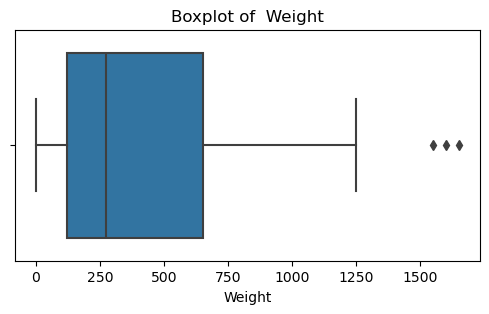

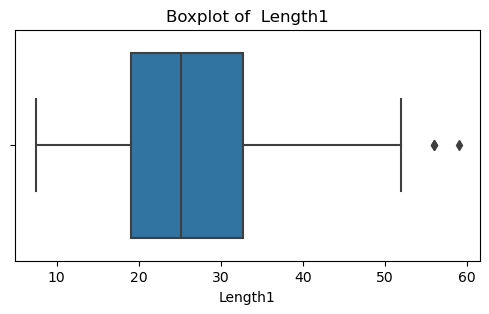

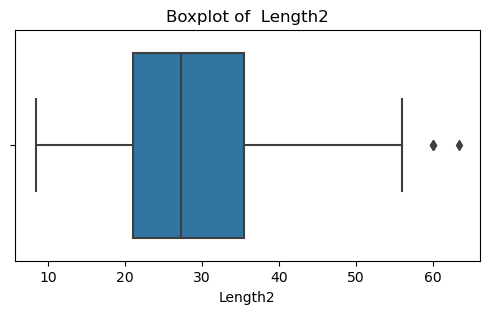

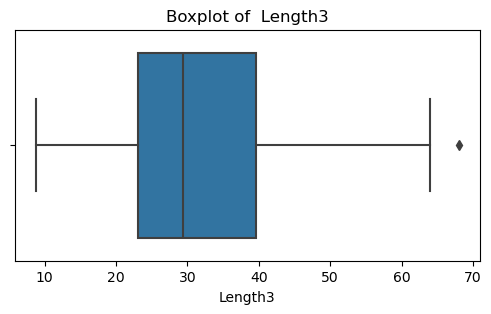

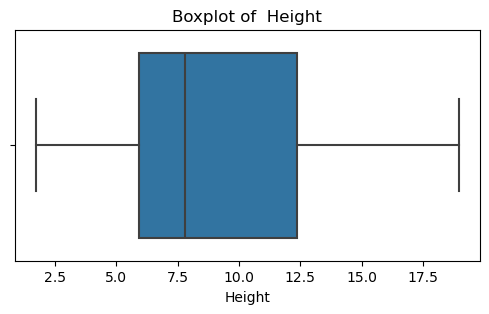

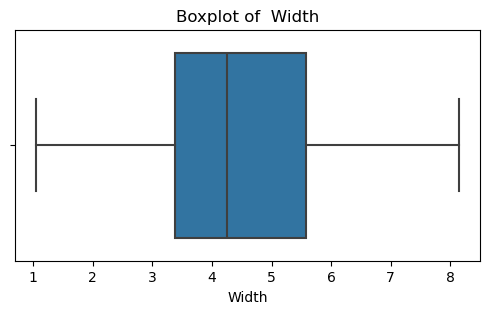

In [5]:
# Show outliers by boxplot
plt.rcParams["figure.figsize"] = (6,3)
sns.boxplot(x=data['Weight'])
plt.title('Boxplot of  Weight')
plt.show()
sns.boxplot(x=data['Length1'])
plt.title('Boxplot of  Length1')
plt.show()
sns.boxplot(x=data['Length2'])
plt.title('Boxplot of  Length2')
plt.show()
sns.boxplot(x=data['Length3'])
plt.title('Boxplot of  Length3')
plt.show()
sns.boxplot(x=data['Height'])
plt.title('Boxplot of  Height')
plt.show()
sns.boxplot(x=data['Width'])
plt.title('Boxplot of  Width')
plt.show()

In [6]:
# There is some outliers in weight, lenght1, length2, length3.
# Function to obtain indices of outliers
def outlier_indices(dataframe_column):
  Q1 = dataframe_column.quantile(0.25)
  Q3 = dataframe_column.quantile(0.75)
  IQR = Q3 - Q1
  upper_end = Q3 + 1.5 * IQR
  lower_end = Q1 - 1.5 * IQR 
  outlier = dataframe_column[(dataframe_column > upper_end) | (dataframe_column < lower_end)]
  return outlier
print("outliers of weight:\n" , outlier_indices(data["Weight"]),"\n\n")
print("outliers of Length1:\n" , outlier_indices(data["Length1"]),"\n\n")
print("outliers of Length2:\n" , outlier_indices(data["Length2"]),"\n\n")
print("outliers of Length3:\n" , outlier_indices(data["Length3"]),"\n\n")

# From boxplot of weight there is element=0 
data[data.Weight <= 0]

outliers of weight:
 142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64 


outliers of Length1:
 142    56.0
143    56.0
144    59.0
Name: Length1, dtype: float64 


outliers of Length2:
 142    60.0
143    60.0
144    63.4
Name: Length2, dtype: float64 


outliers of Length3:
 144    68.0
Name: Length3, dtype: float64 




,Species,Weight,Length1,Length2,Length3,Height,Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516


In [7]:
data=data.drop([40,142,143,144])
data.shape
data=data.iloc[:,1:]

# Data Exploration

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,155.0,377.638065,319.144511,5.9000,120.00000,272.0000,615.00000,1250.000
Length1,155.0,25.698710,9.133355,7.5000,19.05000,25.0000,32.25000,52.000
Length2,155.0,27.833548,9.806718,8.4000,21.00000,27.0000,35.00000,56.000
Length3,155.0,30.621290,10.711621,8.8000,23.15000,29.3000,39.45000,59.700
Height,155.0,8.967102,4.333722,1.7284,5.92695,7.6800,12.37930,18.957
Width,155.0,4.382326,1.675564,1.0476,3.38565,4.2476,5.47275,8.142


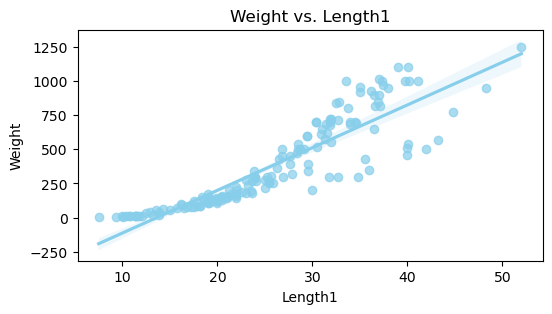

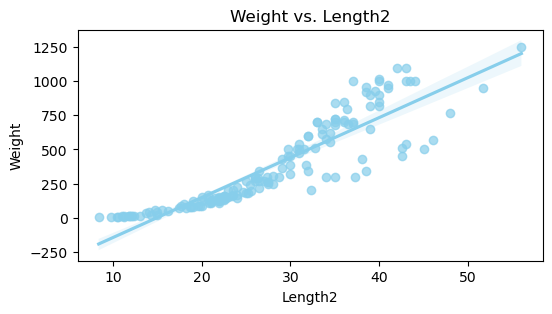

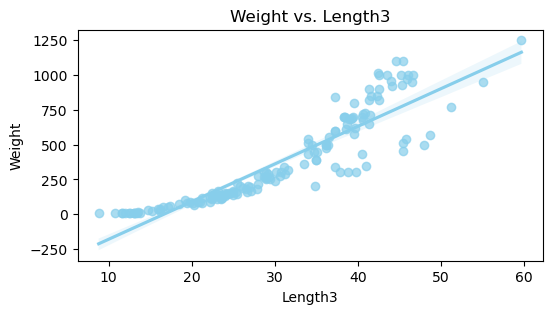

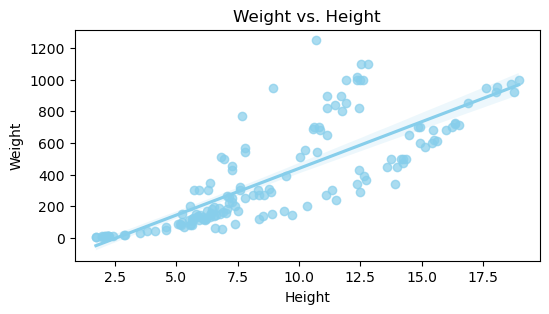

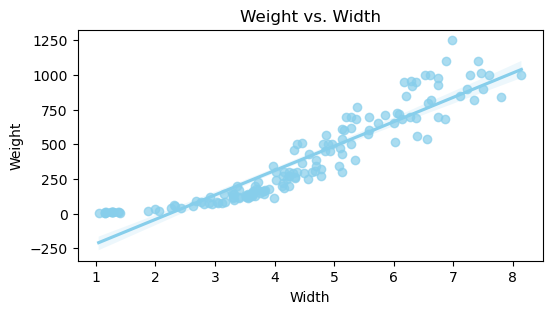

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.895740,0.899734,0.907373,0.801954,0.924029
Length1,0.895740,1.000000,0.999417,0.990580,0.675500,0.888883
Length2,0.899734,0.999417,1.000000,0.993026,0.691166,0.895324
Length3,0.907373,0.990580,0.993026,1.000000,0.755416,0.896793
Height,0.801954,0.675500,0.691166,0.755416,1.000000,0.800091
Width,0.924029,0.888883,0.895324,0.896793,0.800091,1.000000


In [9]:
x=data[["Length1","Length2","Length3","Height","Width"]]
y=data["Weight"]

# Plot relationships bet. features and weight
for feature in x.columns:
    sns.regplot(x=x[feature], y=y, color='skyblue', scatter_kws={'alpha':0.7})
    plt.xlabel(feature)
    plt.ylabel('Weight')
    plt.title(f'Weight vs. {feature}')
    plt.show()


# Correlations
data.corr()


# Building model

In [10]:
warnings.filterwarnings("ignore", category=UserWarning)
# split data into training data and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
# Create the linear regression model
model = linear_model.LinearRegression()
# Fit the model to the data
our_model=model.fit(x_train, y_train)
# intercept (B0)
intercept = model.intercept_

# coefficients (B1, B2, B3, ...)
coefficients = model.coef_


In [11]:

#  parameters
print("Intercept (B0): ",intercept)
for i, coef in enumerate(coefficients, start=1):
    print("Coefficient B(",i,"): ",coef)
print(f"Linear equation = {intercept}+{coefficients[0]}X1+{coefficients[1]}X2+{coefficients[2]}X3+{coefficients[3]}X4+{coefficients[4]}X5+")


Intercept (B0):  -433.25020249278845
Coefficient B( 1 ):  88.15523320192034
Coefficient B( 2 ):  -27.221211141609345
Coefficient B( 3 ):  -41.72720241020635
Coefficient B( 4 ):  34.9247353433249
Coefficient B( 5 ):  60.951430138821706
Linear equation = -433.25020249278845+88.15523320192034X1+-27.221211141609345X2+-41.72720241020635X3+34.9247353433249X4+60.951430138821706X5+


# Testing model

In [12]:

y_fitted = model.predict(x_train)
y_pred = model.predict(x_test)
residuals_train=y_train-y_fitted
residuals_test=y_test-y_pred
r_squared = r2_score(y_train, y_fitted)
n=len(y_train)
adjusted_r_squared = 1 - ((1 - r_squared) * (n - 1)) / (n - 6)
# Calculate MSE for training data
mse_train = mean_squared_error(y_train, y_fitted)
print(f"Mean Squared Error (MSE) on training data: {mse_train}")
# Calculate MSE for test data
mse_test = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE) on test data: {mse_test}")
# Calculate standard deviation of residuals for training data
std_residuals_train = np.std(residuals_train)
print(f"Standard Deviation of Residuals on training data: {std_residuals_train}")
# Calculate standard deviation of residuals for test data
std_residuals_test = np.std(residuals_test)
print(f"Standard Deviation of Residuals on test data: {std_residuals_test}")

# accuracy
print(f"R-squared: {r_squared}")
print(f"Adjusted R-squared: {adjusted_r_squared}")

# Print Residuals
print("\n\nResiduals for training data:")
print(residuals_train)
print("\nResiduals for test data:")
print(residuals_test)

# Predict at specific point
x_node=np.array(x.iloc[2])
print("\n\nPredict at specific point: ")
print("Inputs =",x_node)
y_node=model.predict(x_node.reshape(1,-1))
print("y node = ",y_node)
e=y.iloc[2]-y_node
print("Error = ",e,"\n\n")



Mean Squared Error (MSE) on training data: 10121.99104423607
Mean Squared Error (MSE) on test data: 8890.017212890074
Standard Deviation of Residuals on training data: 100.60810625509293
Standard Deviation of Residuals on test data: 94.27047251447452
R-squared: 0.9017970680792035
Adjusted R-squared: 0.8969831988673997


Residuals for training data:
2      -33.107181
125    178.283107
44     -64.025100
101   -165.830094
10     -50.208953
          ...    
9      -32.100797
104    -96.892978
68    -108.812751
118    -70.508845
48     -45.773806
Name: Weight, Length: 108, dtype: float64

Residuals for test data:
26      36.523804
91     -55.409203
156    152.416591
112    -56.479287
24      55.939644
7      -61.104419
45     -24.248989
107   -148.333380
57     -62.051563
119     34.482764
90     -76.771374
87     -42.227858
138    -92.732405
55     -23.471649
111     40.983770
41     -32.793246
33      80.498731
157     86.487344
72     214.262854
127     53.148133
99     -77.431445
8    

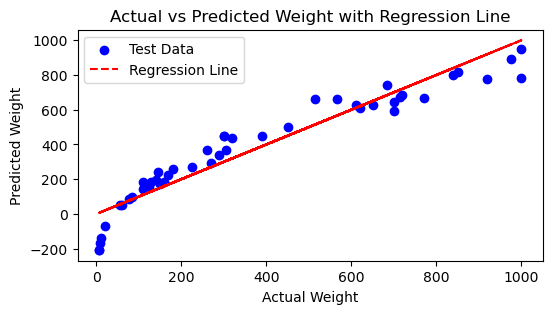

In [13]:
# Plotting the regression line
plt.scatter(y_test, y_pred, color='blue', label='Test Data')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Regression Line')
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.title('Actual vs Predicted Weight with Regression Line')
plt.legend()
plt.show()

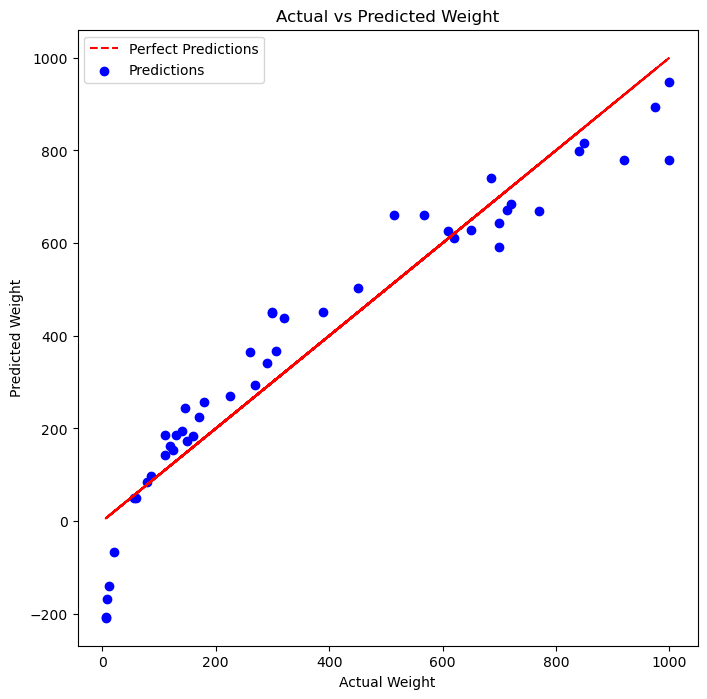

In [14]:
plt.figure(figsize=(8, 8))
plt.plot(y_test, y_test, color='red', linestyle='--', label='Perfect Predictions')
plt.scatter(y_test, y_pred, color='blue', label='Predictions')
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.title('Actual vs Predicted Weight')
plt.legend()
plt.show()

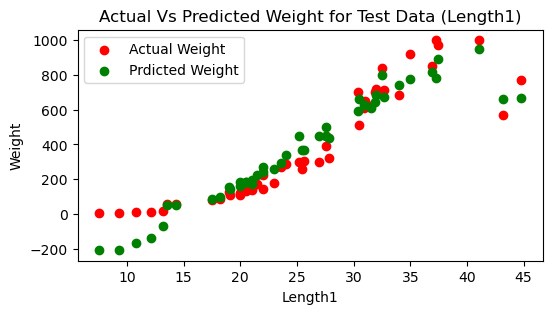

In [15]:

plt.scatter(x_test['Length1'], y_test, color='red', label = 'Actual Weight')
plt.scatter(x_test['Length1'], y_pred, color='green', label = 'Prdicted Weight')
plt.xlabel('Length1')
plt.ylabel('Weight')
plt.title('Actual Vs Predicted Weight for Test Data (Length1)')
plt.legend()
plt.show()


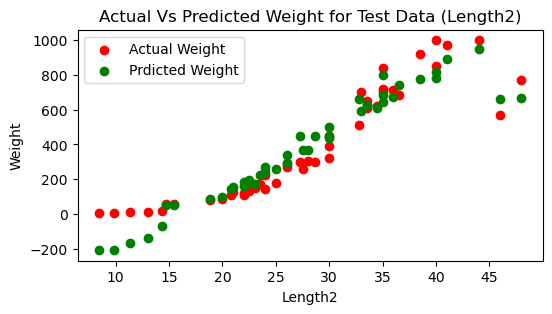

In [16]:

plt.scatter(x_test['Length2'], y_test, color='red', label = 'Actual Weight')
plt.scatter(x_test['Length2'], y_pred, color='green', label = 'Prdicted Weight')
plt.xlabel('Length2')
plt.ylabel('Weight')
plt.title('Actual Vs Predicted Weight for Test Data (Length2)')
plt.legend()
plt.show()


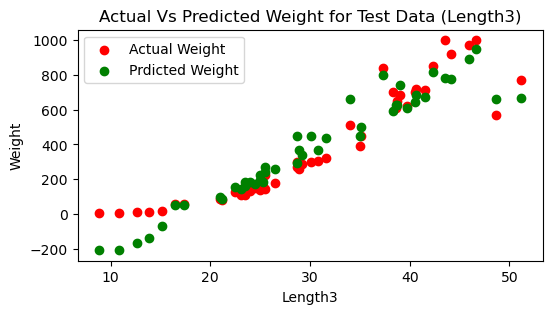

In [17]:

plt.scatter(x_test['Length3'], y_test, color='red', label = 'Actual Weight')
plt.scatter(x_test['Length3'], y_pred, color='green', label = 'Prdicted Weight')
plt.xlabel('Length3')
plt.ylabel('Weight')
plt.title('Actual Vs Predicted Weight for Test Data (Length3)')
plt.legend()
plt.show()


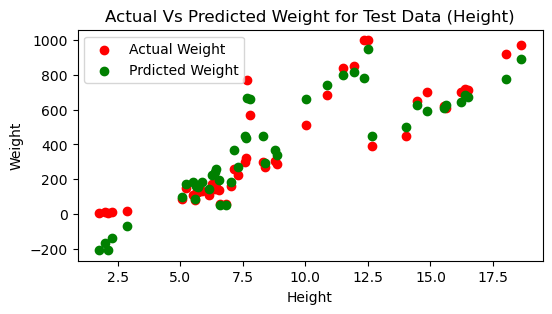

In [18]:

plt.scatter(x_test['Height'], y_test, color='red', label = 'Actual Weight')
plt.scatter(x_test['Height'], y_pred, color='green', label = 'Prdicted Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Actual Vs Predicted Weight for Test Data (Height)')
plt.legend()
plt.show()


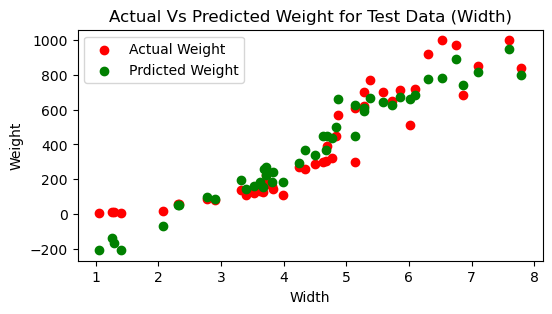

In [19]:

plt.scatter(x_test['Width'], y_test, color='red', label = 'Actual Weight')
plt.scatter(x_test['Width'], y_pred, color='green', label = 'Prdicted Weight')
plt.xlabel('Width')
plt.ylabel('Weight')
plt.title('Actual Vs Predicted Weight for Test Data (Width)')
plt.legend()
plt.show() 



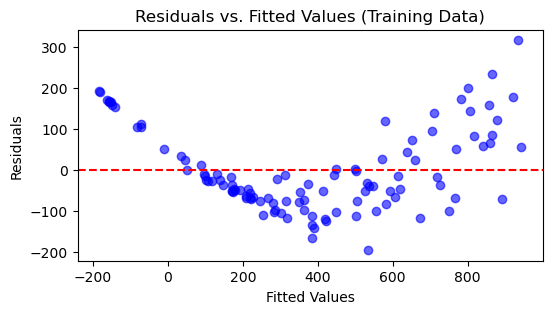

In [20]:

# Plot residuals vs. fitted values for training data
plt.scatter(y_fitted, residuals_train, color='blue', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values (Training Data)')
plt.show()  



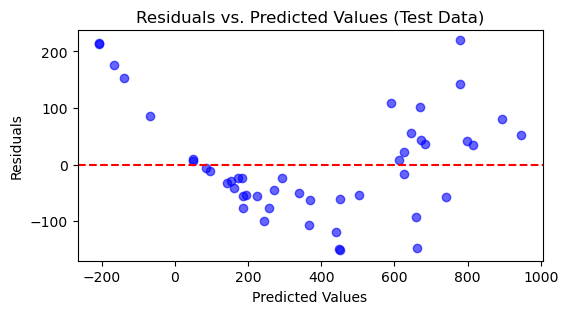

In [21]:

# Plot residuals vs. predicted values for test data
plt.scatter(y_pred, residuals_test, color='blue', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values (Test Data)')
plt.show()

In [22]:
# create a DataFrame
train_data = pd.concat([x_train, y_train], axis=1)

# Fit model 
model_formula = 'Weight ~ Length1 + Length2 + Length3 + Height + Width'
ols_model = smf.ols(formula=model_formula, data=train_data).fit()

# ANOVA 
total_anova_results = anova_lm(ols_model)


total_sum_sq = total_anova_results['sum_sq'].sum()
total_df = total_anova_results['df'].sum()
total_mean_sq = total_sum_sq / total_df
total_f_statistic = total_mean_sq / total_anova_results.loc['Residual', 'mean_sq']
total_p_value = ols_model.f_pvalue
residual_sum_sq = total_anova_results.loc['Residual', 'sum_sq']
residual_df = total_anova_results.loc['Residual', 'df']
residual_mean_sq = residual_sum_sq / residual_df

# Table
anova_results = pd.DataFrame({
    'Source': ['Total', 'Residual'],
    'df': [total_df, residual_df],
    'sum_sq': [total_sum_sq, residual_sum_sq],
    'mean_sq': [total_mean_sq, residual_mean_sq],
    'F': [total_f_statistic, np.nan],  # Replace empty value with NaN
    'PR(>F)': [total_p_value, np.nan]  # Replace empty value with NaN
})


print("Model Summary:")
print(ols_model.summary(),"\n\n")

# Print the ANOVA results DataFrame
print("ANOVA Results:")
print(tabulate(anova_results, headers='keys', tablefmt='grid', showindex=False, missingval='nan'))

Model Summary:
                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     187.3
Date:                Thu, 09 May 2024   Prob (F-statistic):           9.68e-50
Time:                        12:41:00   Log-Likelihood:                -651.26
No. Observations:                 108   AIC:                             1315.
Df Residuals:                     102   BIC:                             1331.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -433.2502     31.208    -